In [ ]:
x = list(range(10))
y = [1, 1, 2, 4, 5, 7, 8, 9, 9, 10]

print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 1, 2, 4, 5, 7, 8, 9, 9, 10]


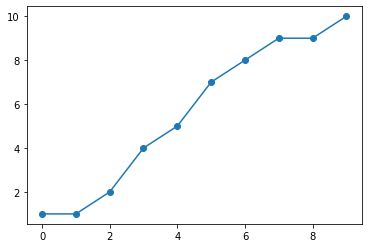

In [ ]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.scatter(x, y)
plt.show()

In [ ]:
class H():
    def __init__(self, w):
        self.w = w
    
    def forward(self, x):
        return self.w * x

def cost(h, x, y):
    error = 0
    for i in range(len(x)):
        error += (h.forward(x[i]) - y[i]) ** 2
    error /= len(x)
    return error
    
h = H(4)
cost(h, x, y)

222.2

In [ ]:
list_w = list()
list_c = list()

for i in range(-100, 100):
    w = i * 0.1
    h = H(w)
    c = cost(h, x, y)
    list_w.append(w)
    list_c.append(c)        

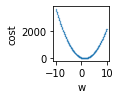

In [ ]:
plt.figure(figsize=(1, 1)) # Graph의 size 조절
plt.xlabel('w')
plt.ylabel('cost')
plt.scatter(list_w, list_c, s=0.1) # s: Marker의 size 조절

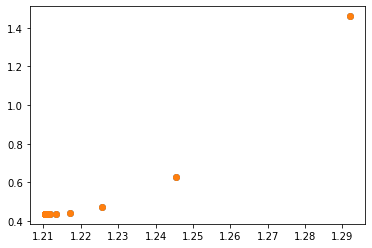

In [ ]:
def cal_grad(w, cost):
    h = H(w)
    cost1 = cost(h, x, y)
    eps = 0.00001
    h = H(w + eps)
    cost2 = cost(h, x, y)
    dcost = cost2 - cost1
    dw = eps
    grad = dcost / dw
    return grad, (cost1 + cost2) * 0.5

def cal_grad2(w, cost):
    h = H(w)
    grad = 0
    for i in range(len(x)):
        grad += 2 * (h.forward(x[i]) - y[i]) * x[i]
    grad /= len(x)
    c = cost(h, x, y)
    return grad, c

w1 = 1.4
w2 = 1.4
lr = 0.01

list_w1 = []
list_w2 = []
list_c1 = []
list_c2 = []

for i in range(100):
    grad, mean_cost = cal_grad(w1, cost)
    grad2, mean_cost2 = cal_grad2(w2, cost)
    
    w1 -= lr * grad
    w2 -= lr * grad2
    list_w1.append(w1)
    list_w2.append(w2)
    list_c1.append(mean_cost)
    list_c2.append(mean_cost2)
    # print(w1, mean_cost, w2, mean_cost2)

plt.scatter(list_w1, list_c1)
plt.scatter(list_w2, list_c2)